<img src="https://images.emojiterra.com/google/android-12l/512px/1f4da.png"
    style="width:100px; float: right; margin: 0 10px 10px 10px;"></img>
# Final EDA
**Price Prediction Model for Books (in EUR)**
***

Link to a dataset: https://zenodo.org/records/4265096

Link to GitHub: https://github.com/katepopkova8/my_capstone_project

Prepared by Kate Popkova

## Introduction

The book industry faces the complex challenge of pricing books in a way that maximizes profit while remaining attractive to readers. Factors influencing book prices include author popularity, genre trends, publication date, and market demand.

**Opportunities**:
1. Dynamic Pricing Strategy: Leveraging data to adjust prices in response to market demands and trends.
2. Inventory Management: Bookstores and online retailers can manage stock more efficiently by understanding which books are likely to sell at certain prices.
3. Market Analysis: Insight into which factors most significantly impact book prices can guide publishers and authors in decision-making processes, from marketing strategies to choosing publication dates.

**Who Experiences These Problems?**
- Publishers: Struggle to set optimal prices that balance profitability with market competitiveness.
- Retailers: Both online and physical bookstores need to competitively price books to maximize sales and manage inventory. 
- Authors: Especially self-published authors, who must decide on the pricing of their books without the resources of large publishing houses.

**Benefit from the Outcomes**:
- Access to a data-driven pricing model can assist in making more informed decisions, potentially increasing sales and profit margins.
- Better pricing strategies lead to improved customer satisfaction and loyalty.

#### **The Big Idea: Machine Learning Solutions**
Machine learning can revolutionize book pricing by providing a predictive model that considers a wide range of factors influencing a book's value in the market.

- Pattern Recognition: Machine learning algorithms can identify patterns and correlations between various factors (like genre popularity, author reputation, and historical sales data) and book prices.
- Predictive Analytics: By analyzing historical data, the model can forecast optimal pricing points for new or existing books.
- Customization: Machine learning models can be trained to adapt to specific market segments, genres, or geographical regions, providing tailored pricing strategies.

#### **The Impact: Societal and Business Value**

**Business Value**

- Increased Profitability: More accurate pricing leads to better sales and profit margins.
- Market Competitiveness: Businesses can stay competitive by dynamically adjusting prices in response to market trends.
- Efficient Inventory Management: Reduces the likelihood of overstocking or understocking.

**Societal Value**

- Accessibility: Properly priced books become more accessible to a broader audience, potentially increasing literacy and education.
- Author Recognition: Fair pricing strategies can lead to more equitable recognition and compensation for authors, especially those who are new or self-published.

My projects aims to build a price prediction model in the book industry. The dataset I'll be using has 52,478 records on books collected from an e-commerce platform called Iberlibro (https://www.iberlibro.com/). IberLibro is an online platform for the buying and selling of books, art and collectibles . It is trusted by independent sellers around the world to offer millions of new, second-hand and collectible books; as well as art and collecting items.

The dataset was created by two students Lorena Casanova Lozano and Sergio Costa Planells in 2020 in Barcelona, Spain. 

In this notebook, I will explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 


## Data Dictionary

My dataset (books_1.Best_Books_Ever.csv) containes the following fields:

| Attributes | Definition|
|:------------|:------------|
| bookId     | Book Identifier as in goodreads.com |
| title      | Book title |
| series     | Series Name |
| author      | Book's Author |
| rating     | Global goodreads rating |
| description      | Book's description |
| language     | Book's language |
| isbn     | Book's ISBN |
| genres     | Book's genres |
| characters      | Main characters |
| bookFormat     | Type of binding |
| edition     | Type of edition (ex. Anniversary Edition) |
| pages     | Number of pages |
| publisher      | Editorial |
| publishDate      | Publication date |
| firstPublishDate      | Publication date of first edition |
| awards      | List of awards |
| numRatings      | Number of total ratings|
| ratingsByStars      | Number of ratings by stars (from 5 to 1)|
| likedPercent      | Derived field, percent of ratings over 2 starts (as in GoodReads) |
| setting      | Story setting |
| coverImg      | URL to cover image |
| bbeScore      | Score in Best Books Ever list |
| bbeVotes      | Number of votes in Best Books Ever list |
| price      | Book's price in EUR (extracted from Iberlibro) |



**`price`** is my target variable, and I'll be focusing on attributes relevant to book pricing, such as 

- **`genres`**, 
- **`bookFormat`**, 
- **`publisher`**, and
- **`pages`**.

## Part 1: Data Exploration

1. [Initial Data Review](#Initial-Data-Review)
2. [Irrelevant Columns](#Irrelevant-Columns)
3. [Statistical Summary](#Statistical-Summary)
4. [Initial Data Visualization](#Initial-Data-Visualization)
5. [Missing Values](#Missing-Values)
6. [Feature Engineering](#Feature-Engineering)
7. [Preprocessing for Modeling](#Preprocessing-for-Modeling)
8. [Data Splitting](#Data-Splitting)

### Initial Data Review

I'm goint to get a basic understanding of my dataset, look at the first few rows, understand each column's type and role, and identify any obvious issues or anomalies.

In [5]:
# The libraries I'll be using to conduct EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
# To upload the data from csv file and to do a quick sanity check
df=pd.read_csv('books_1.Best_Books_Ever.csv')
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [7]:
# The shape of the data
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(52478, 25)


In [8]:
# To check the data types
print("Info of the DataFrame:")
df.info()

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards           

In [9]:
# Counting unique values for each column
print("Unique values in each column:")
print(df.nunique())

Unique values in each column:
bookId              52424
title               49927
series              22802
author              28227
rating                261
description         50888
language               81
isbn                48072
genres              44154
characters          12448
bookFormat            136
edition              1788
pages                1365
publisher           11110
publishDate         10635
firstPublishDate     8024
awards               9215
numRatings          19347
ratingsByStars      49908
likedPercent           66
setting              4651
coverImg            51819
bbeScore             3541
bbeVotes              649
price                3776
dtype: int64


In [10]:
# Check if there are duplicated rows in the dataset
print("Number of duplicated rows:")
print(df.duplicated().sum())

Number of duplicated rows:
50


In [11]:
# Dropping the duplicated rows
df = df.drop_duplicates()
df.shape

(52428, 25)

In [12]:
# The sum of NA values in each column, sorted in descending order
print("Number of missing values in each column (sorted in descending order):")
print(df.isna().sum().sort_values(ascending=False))

Number of missing values in each column (sorted in descending order):
edition             47479
series              28983
firstPublishDate    21303
price               14344
language             3801
publisher            3692
pages                2343
bookFormat           1473
description          1336
publishDate           879
likedPercent          621
coverImg              605
isbn                    0
ratingsByStars          0
bbeVotes                0
bbeScore                0
setting                 0
awards                  0
numRatings              0
genres                  0
author                  0
rating                  0
title                   0
characters              0
bookId                  0
dtype: int64


In [13]:
# Summary of the missing values in each column, along with their respective percentages
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_summary

,Missing Values,Percentage (%)
edition,47479,90.560388
series,28983,55.281529
firstPublishDate,21303,40.632868
price,14344,27.359426
language,3801,7.249943
publisher,3692,7.042039
pages,2343,4.468986
bookFormat,1473,2.809567
description,1336,2.548257
publishDate,879,1.676585


**Summary**
* The columns in my dataset have high cardinality. It can lead to issues like overfitting and increased computational complexity. I'll consider managing this through techniques like binning.
* A significant amount of columns that are relevant to my project goal have a substantial amount of missing data. This can affect my analysis or model's accuracy. 

### Irrelevant Columns

I'm going to drop the columns that are with redundant information and are not related to the `price` target variable. These colums are:
- `bookId`, 
- `isbn`, 
- `publishDate`,
- `firstPublishDate`, and 
- `likedPercent`. 

I'll also drop columns that contain images and large text. 
These columns are:
- `description`, 
- `setting`, and 
- `coverImg`. 

I'll revisit these columns later in my analysis, for now I don't need them. 

In [14]:
# Columns to be dropped
columns_to_drop = ['bookId', 'description', 'isbn', 'publishDate', 'likedPercent', 
                   'setting', 'coverImg', 'firstPublishDate']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

# Shape of the final data
print("Shape of the DataFrame after dropping the specified columns:")
df.shape

Shape of the DataFrame after dropping the specified columns:


(52428, 17)

### Statistical Summary

Before I perform a more detailed exploratory analysis on the reduced dataset, I'm going to convert `price` column from object to a numeric data type.

In [15]:
# Converting the 'price' column to a numeric data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtype                      

dtype('float64')

In [16]:
# Statistical summary of the numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,52428.0,4.021865,0.367116,0.00,3.82,4.03,4.2300,5.00
numRatings,52428.0,17892.598440,103993.201959,0.00,341.00,2309.50,9389.0000,7048471.00
bbeScore,52428.0,1985.832475,35169.854432,0.00,84.00,97.00,187.0000,2993816.00
bbeVotes,52428.0,22.549535,369.333934,-4.00,1.00,1.00,2.0000,30516.00
price,38072.0,9.657951,24.305323,0.84,3.24,5.20,8.8525,898.64


The preliminary EDA reveals the following insights:

* The average price per book is around 10 EUR.
* The average book rating is around 4.02, with a standard deviation of 0.37.
* The number of ratings per book varies widely, with an average of about 17,879 but a high standard deviation, indicating a large spread.
* The bbeScore and bbeVotes have a wide range, which may indicate outliers or a highly varied dataset.

### Initial Data Visualization

Next, I will explore the distribution of my dataset.

#### Distribution of numerical columns.

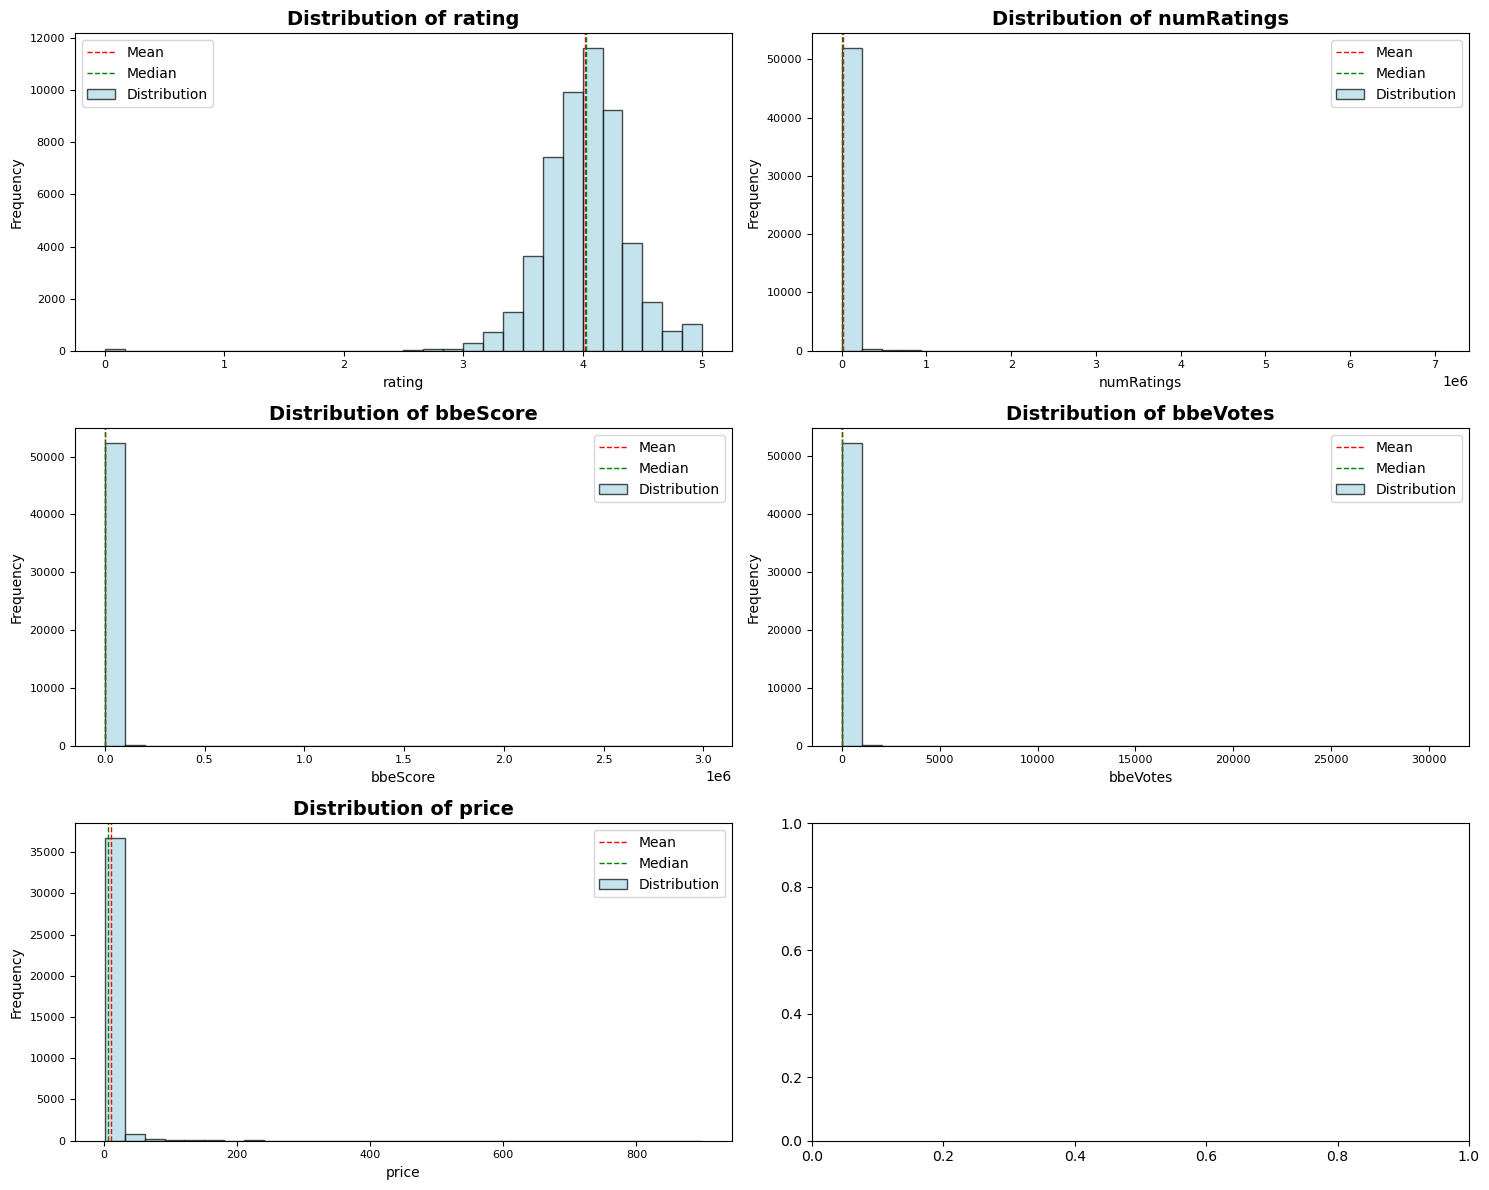

In [17]:
# First, I need to identify numeric columns
df_num = df.select_dtypes(include="number")

# I will make 3 rows x 2 columns of subplots
plt.subplots(3,2, figsize=(15,12))

# Creating the for loop
for slot_num, column in enumerate(df_num.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(3,2,slot_num)
    plt.hist(df[column], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Set the titles and labels
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tick_params(axis='x', labelsize=8)  # Make x-axis labels smaller
    
    # Adding median and mean lines
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1)
    plt.legend(['Mean', 'Median', 'Distribution'])
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    
plt.tight_layout()
plt.show()

 - **`Rating`**: The distribution of ratings appears to be left-skewed, indicating that most books have high ratings. There's a concentration of ratings around 4, suggesting that readers generally rate books positively.

To better visualize the rest of the numerical data, I'll use logarithmic scales. This can help in spreading out the data points more evenly across the histogram and providing a clearer view of the distribution.

**Distribution of `numRatings`**

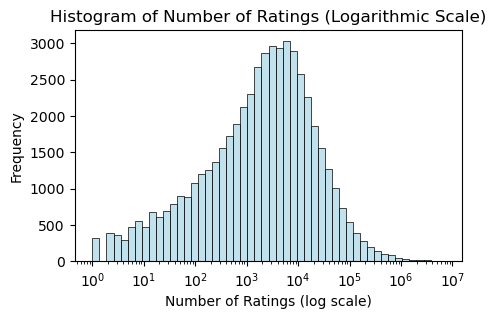

In [18]:
# Filtering out zero and negative values for the logarithmic scale
positive_num_ratings = df['numRatings'][df['numRatings'] > 0]

# The histogram for the 'numRatings' column with a logarithmic scale
plt.figure(figsize=(5, 3))
sns.histplot(positive_num_ratings, bins=50, log_scale=True, color='lightblue')
plt.title('Histogram of Number of Ratings (Logarithmic Scale)')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Frequency')
plt.show()

* The distribution of the number of ratings appear more uniform across the different magnitudes.

* Books in the dataset have a wide range of ratings, from a few to several thousand. 

**Distribution of `price`**

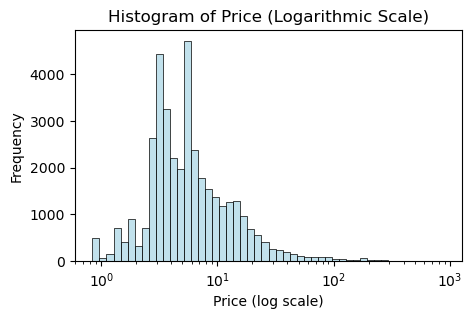

In [19]:
# Filtering out zero and negative values for the logarithmic scale
positive_prices = df['price'][df['price'] > 0]

# The histogram for the 'price' column with a logarithmic scale
plt.figure(figsize=(5, 3))
sns.histplot(positive_prices, bins=50, log_scale=True, color='lightblue')
plt.title('Histogram of Price (Logarithmic Scale)')
plt.xlabel('Price (log scale)')
plt.ylabel('Frequency')
plt.show()

* The tail of the histogram extends further, indicating the presence of books with significantly higher prices, although they are less frequent.

* The distribution still appears right-skewed on the logarithmic scale. While most books are priced lower, there are books across a wide range of higher prices.

**Distribution of `bbeScore` and `bbeVotes`**

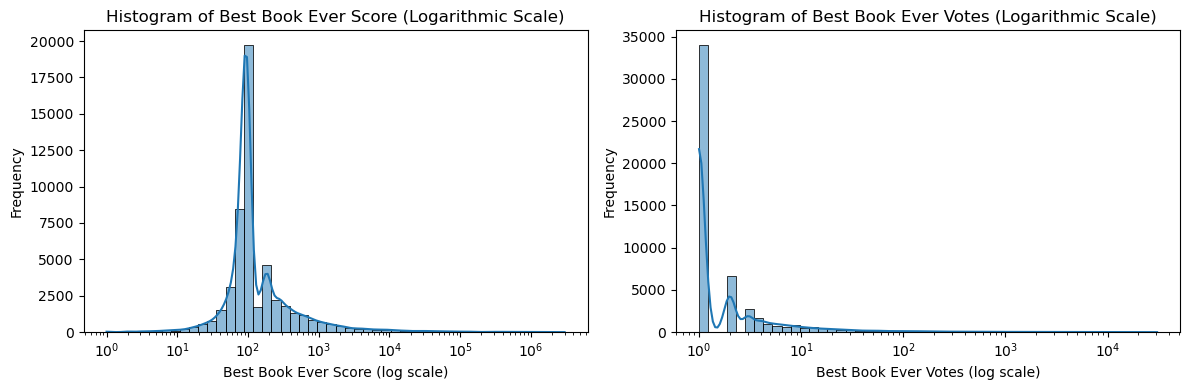

In [20]:
# Filtering out zero and negative values for the logarithmic scale for bbeScore and bbeVotes
positive_bbeScore = df['bbeScore'][df['bbeScore'] > 0]
positive_bbeVotes = df['bbeVotes'][df['bbeVotes'] > 0]

# Plotting histograms for bbeScore and bbeVotes with logarithmic scales
plt.figure(figsize=(12, 4))

# Histogram for bbeScore
plt.subplot(1, 2, 1)
sns.histplot(positive_bbeScore, bins=50, kde=True, log_scale=True)
plt.title('Histogram of Best Book Ever Score (Logarithmic Scale)')
plt.xlabel('Best Book Ever Score (log scale)')
plt.ylabel('Frequency')

# Histogram for bbeVotes
plt.subplot(1, 2, 2)
sns.histplot(positive_bbeVotes, bins=50, kde=True, log_scale=True)
plt.title('Histogram of Best Book Ever Votes (Logarithmic Scale)')
plt.xlabel('Best Book Ever Votes (log scale)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Best Book Ever Score (bbeScore):**

* The distribution on the log scale shows a broader range of scores. Most scores are clustered in the lower range, but there's a visible spread into higher score ranges.
* The distribution remains right-skewed, indicating that fewer books achieve very high scores.

**Best Book Ever Votes (bbeVotes):**

* Similar to the bbeScore, the votes are mostly concentrated in the lower range, with fewer books receiving a high number of votes.
* The histogram exhibits a long tail, highlighting that while the majority of books have fewer votes, some have managed to gather a significantly higher number of votes.

#### Distribution of categorical columns.

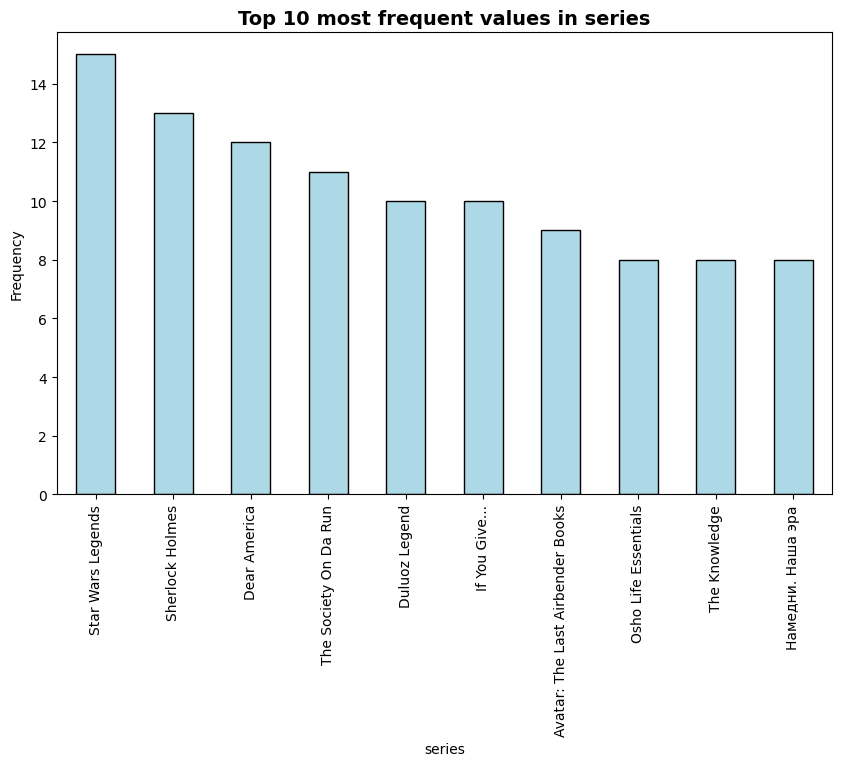

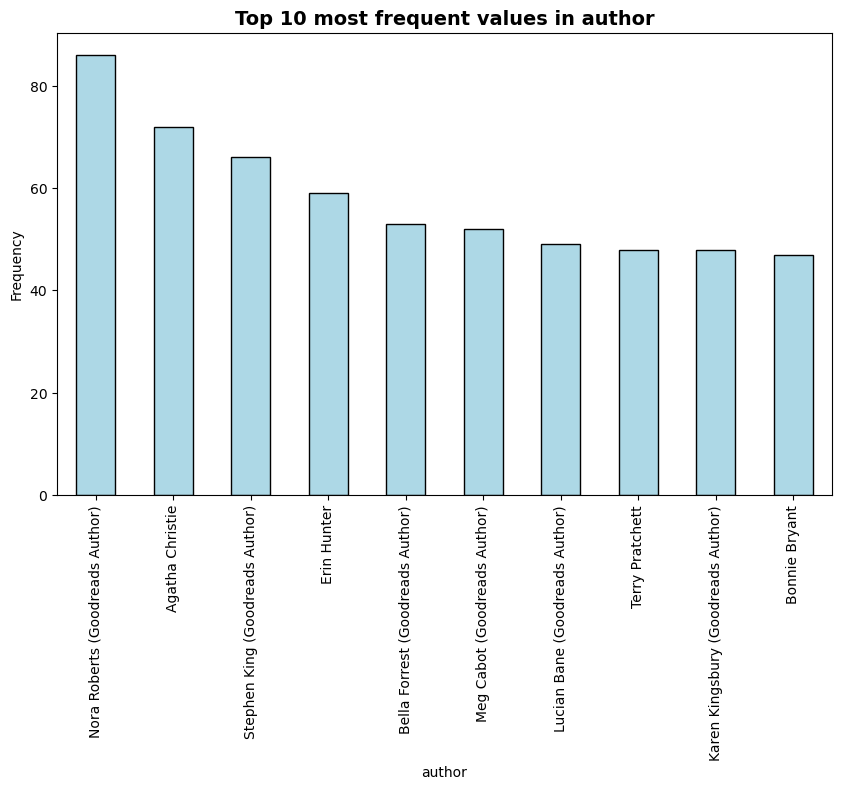

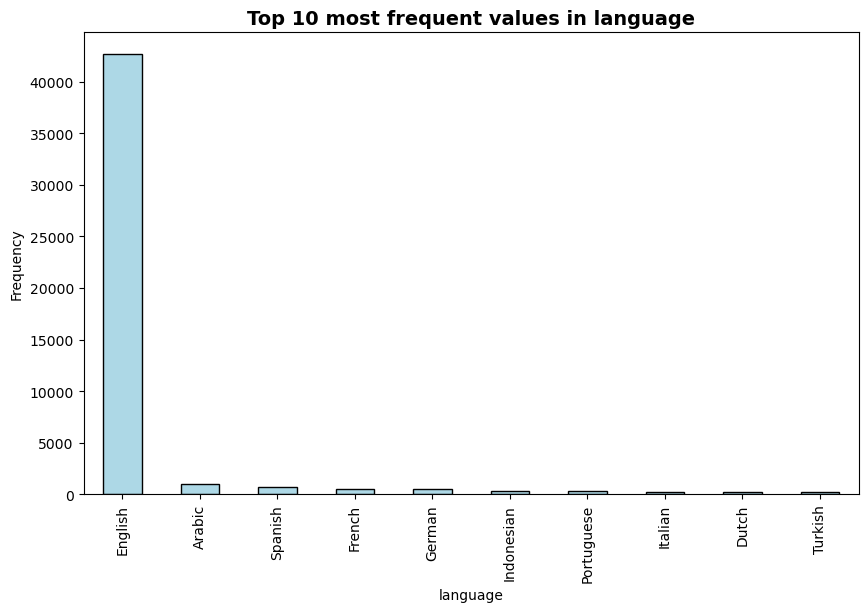

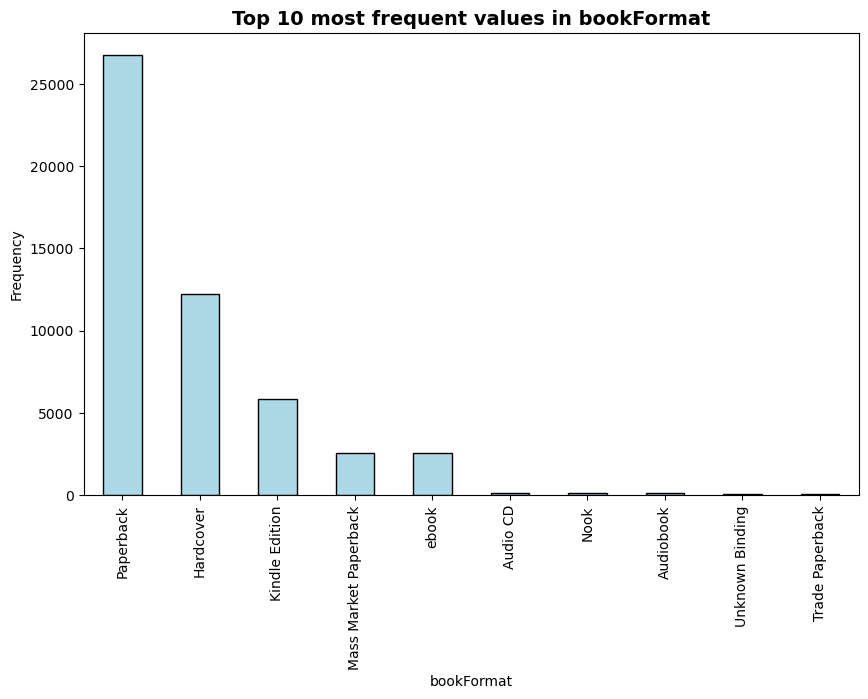

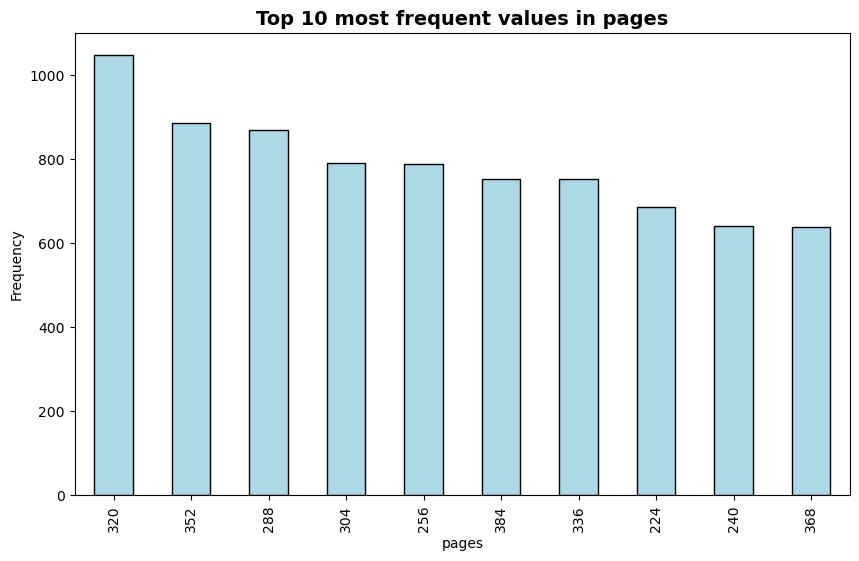

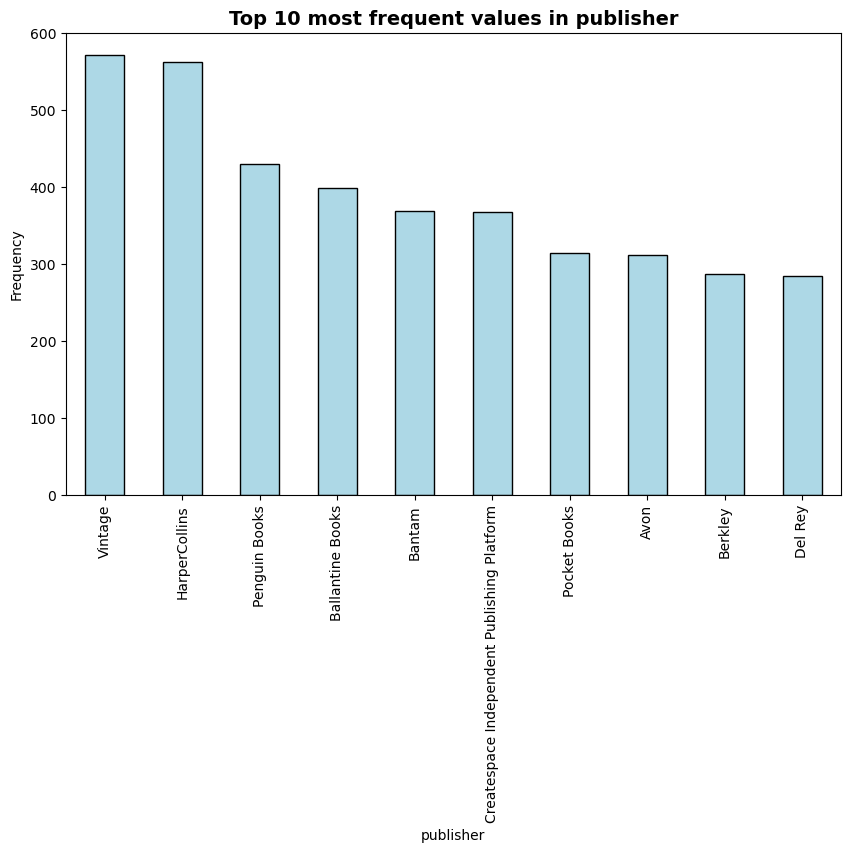

In [21]:
# Selecting categorical columns I'm interested in
categorical_columns = ['series', 'author', 'language', 'bookFormat', 'pages', 'publisher']

# Looping through each categorical column to create a bar chart for the top 10 values
for col in categorical_columns:
    top_10_values = df[col].value_counts().nlargest(10) 

    plt.figure(figsize=(10, 6))
    top_10_values.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Top 10 most frequent values in {col}', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency')
    plt.show()

**Summary**
* The most frequent series are **Star Wars Legends**, **Sherlock Holmes** and **Dear America**. This could indicate popular series with multiple books.

* The authors with popular works are **Nora Roberts**, **Agatha Christie** and **Stephen King**.

* The most common language is **English**.

* The most common formats are **paperback**, **hardcover**, **kindle edition**, **MMP**, and **e-book**. This reflects publishing trends and reader preferences.

* This chart shows the most common page counts, around **300 pages**. It gives an idea of the typical length of books in the dataset.

* The most frequent publishers are **Vintage** and **Harper Collins**, indicating which publishers have the most books in this collection.

For my project, I'm going to analyze English books only. 

In [22]:
# Displaying the unique values in the 'language' column
unique_languages = df['language'].unique()
print(unique_languages)

['English' 'French' 'German' 'Persian' 'Arabic' nan 'Spanish'
 'Multiple languages' 'Portuguese' 'Indonesian' 'Turkish' 'Polish'
 'Bulgarian' 'Tamil' 'Japanese' 'Romanian' 'Italian'
 'French, Middle (ca.1400-1600)' 'Norwegian' 'Urdu' 'Dutch' 'Finnish'
 'Marathi' 'Chinese' 'Swedish' 'Icelandic' 'Malayalam' 'Croatian'
 'Estonian' 'Greek, Modern (1453-)' 'Russian' 'Kurdish' 'Danish' 'Hindi'
 'Filipino; Pilipino' 'Serbian' 'Bengali' 'Malay' 'Catalan; Valencian'
 'Czech' 'Vietnamese' 'Armenian' 'Georgian' 'Kannada' 'Korean' 'Nepali'
 'Slovak' 'Telugu' 'Hungarian' 'English, Middle (1100-1500)' 'Azerbaijani'
 'Farsi' 'Lithuanian' 'Ukrainian' 'Bokmål, Norwegian; Norwegian Bokmål'
 'Iranian (Other)' 'Faroese' 'Basque' 'Macedonian' 'Maltese' 'Gujarati'
 'Amharic' 'Aromanian; Arumanian; Macedo-Romanian' 'Assamese'
 'Panjabi; Punjabi' 'Albanian' 'Latvian' 'Bosnian' 'Afrikaans' 'Thai'
 'Dutch, Middle (ca.1050-1350)' 'Mongolian' 'Tagalog' 'Galician' 'Aleut'
 'Slovenian' 'Undetermined' 'Greek, Ancien

In [23]:
# Dropping rows where the language does not contain 'English'
df = df[df['language'].str.contains('English', na=False)]

# Displaying the head of the dataframe to confirm the operation
df.shape

(42636, 17)

Let's look at correlation between numerical columns.

In [24]:
# Selecting numerical columns
df_num = df.select_dtypes(include="number")
df_num.corr()

,rating,numRatings,bbeScore,bbeVotes,price
rating,1.000000,0.019677,0.018669,0.018948,0.129958
numRatings,0.019677,1.000000,0.710052,0.719856,-0.026839
bbeScore,0.018669,0.710052,1.000000,0.999307,-0.007472
bbeVotes,0.018948,0.719856,0.999307,1.000000,-0.008208
price,0.129958,-0.026839,-0.007472,-0.008208,1.000000


The heatmap below displays the correlation matrix for the numerical columns in your dataset. 

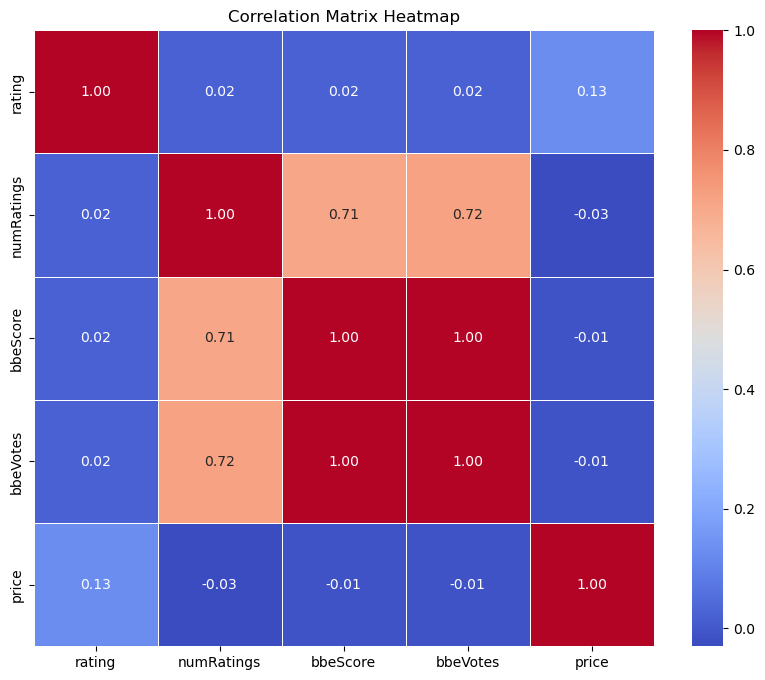

In [25]:
# To display the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(round(df_num.corr(),2),cmap='coolwarm',annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

* The target variable `price` does not show strong linear correlation with most numerical variables. This suggests that linear relationships might not be strongly evident in my dataset, or that the price is influenced by factors not captured in these numerical variables alone.

* Variables like `numRatings`, `bbeScore`, and `bbeVotes` show significant positive correlations with each other. This indicates that books with a higher number of ratings tend to have higher scores and votes, which is intuitive as more popular books are likely to attract more attention and engagement.

Now I'm going to explore the relationship between certain categorical variables and `price`.

**`author` vs. `price`**

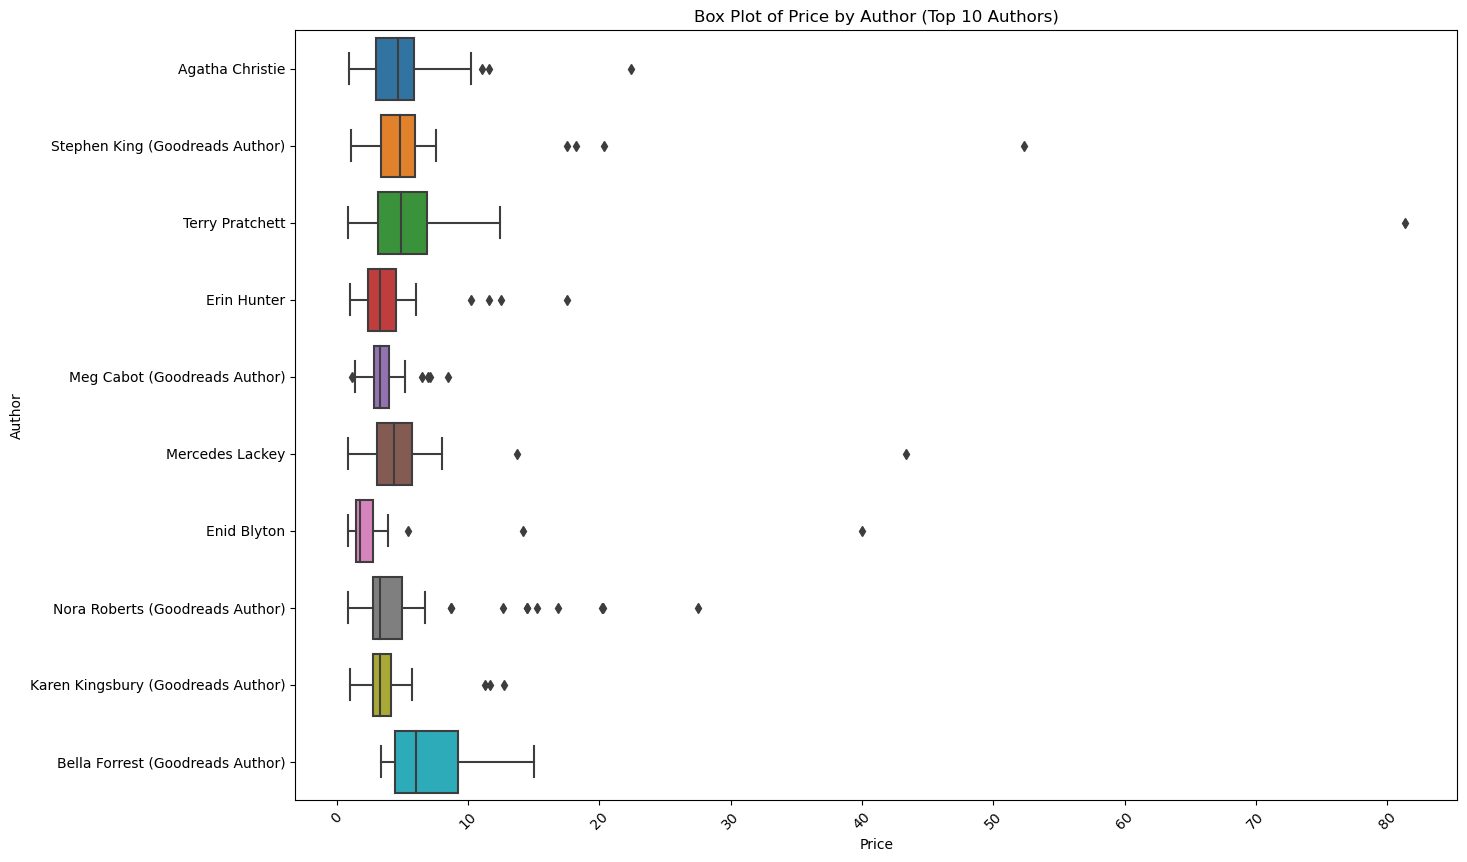

In [26]:
# Creating a box plot to show the relationship between 'author' and 'price'
plt.figure(figsize=(15, 10))
sns.boxplot(x='price', y='author', data=df[df['author'].isin(df['author'].value_counts().nlargest(10).index)])
plt.title('Box Plot of Price by Author (Top 10 Authors)')
plt.xlabel('Price')
plt.ylabel('Author')
plt.xticks(rotation=45)
plt.show()

- There's a noticeable variation in median prices across different authors.
- Lucian Bane's books are significantly higher in prices than the typical range for books by other authors.
- Two outliers with prices at ~50 EUR and ~80 EUR.

**`bookFormat` vs. `price`**

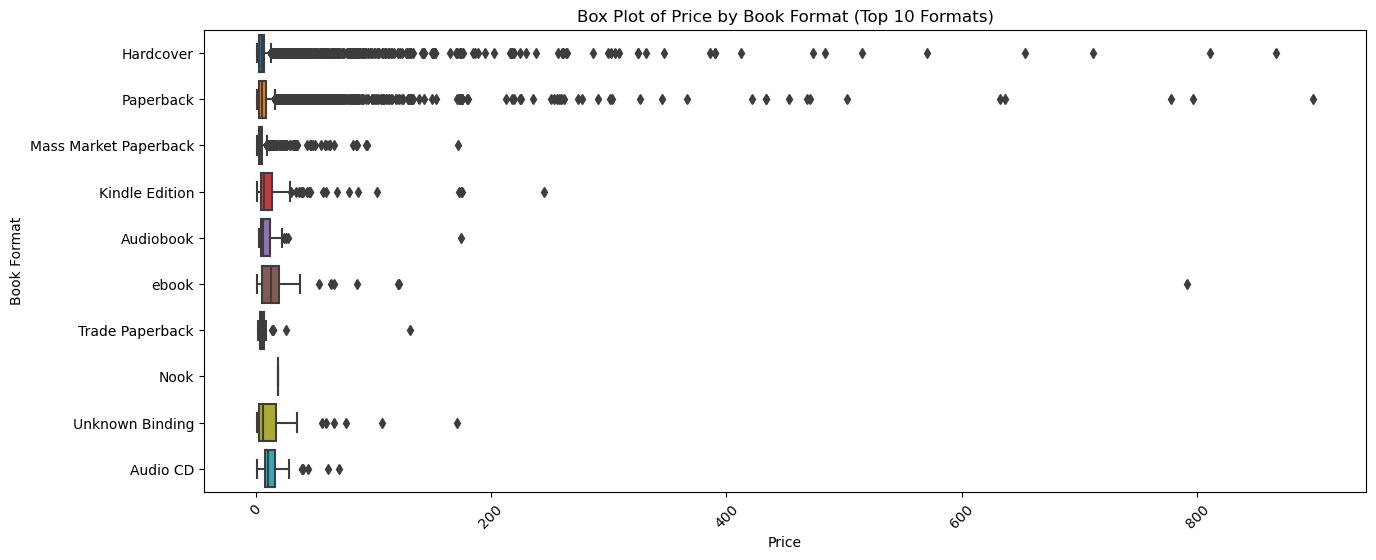

In [27]:
# Creating a box plot to show the relationship between 'bookFormat' and 'price'
plt.figure(figsize=(15, 6))
sns.boxplot(x='price', y='bookFormat', data=df[df['bookFormat'].isin(df['bookFormat'].value_counts().nlargest(10).index)])
plt.title('Box Plot of Price by Book Format (Top 10 Formats)')
plt.xlabel('Price')
plt.ylabel('Book Format')
plt.xticks(rotation=45)
plt.show()

- Some formats might inherently be more expensive due to production costs and other factors.

### Missing Values

Now I'm going to focus on missing data.

In [28]:
# The sum of NA values in each column, sorted in descending order after dropping irrelevant columns
df.isna().sum().sort_values(ascending=False)

edition           38783
series            21947
price              9100
publisher          2446
pages              1331
bookFormat          446
rating                0
language              0
genres                0
characters            0
author                0
awards                0
numRatings            0
ratingsByStars        0
bbeScore              0
bbeVotes              0
title                 0
dtype: int64

In [29]:
# Summary of the missing values in each column, along with their respective percentages
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_values_summary

,Missing Values,Percentage (%)
edition,38783,90.963036
series,21947,51.475279
price,9100,21.343466
publisher,2446,5.736936
pages,1331,3.121775
bookFormat,446,1.046064
rating,0,0.000000
language,0,0.000000
genres,0,0.000000
characters,0,0.000000


I'm going to remove missing values from columns that represent 1-10% of the dataset. 

In [30]:
# Identifying the columns that need to be cleaned
columns_to_clean = ['publisher', 'pages', 'bookFormat']

# Removing rows with missing values in the specified columns
df = df.dropna(subset=columns_to_clean)

# Shape of the cleaned data
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(39195, 17)

Since the `price` column is my target variable for a price prediction model, the presence of a significant amount of missing data (about 27.38%) is a crucial issue to address. The data is not normally distributed so I'm not going to do Mean/Median Imputation. Instead, I will exclude rows with missing price data. This reduces the dataset size but can result in a cleaner, more reliable dataset for modeling.

In [31]:
# Dropping rows with missing values in the 'price' column
df = df.dropna(subset=['price'])

# Shape of the data after dropping missing values in 'price'
print("Shape of the DataFrame:")
df.shape

Shape of the DataFrame:


(32775, 17)

In [32]:
cleaned_file_path = 'cleaned_books_data.csv' 
df.to_csv(cleaned_file_path, index=False)  # Saving the dataframe to a CSV file without the index